In [56]:
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sbn.set(style="whitegrid") # seteando tipo de grid en seaborn

# **Apertura de archivos a usar durante la resolucion del trabajo practico.**

In [57]:
postulaciones_educacion = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_1_postulantes_educacion.csv')
postulaciones_genero_edad = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_6_avisos_detalle.csv')

# Chequeo elementos nulos es los archivos

In [58]:
postulaciones_educacion.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

In [59]:
postulaciones_genero_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [60]:
vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [61]:
avisos_online.isnull().any()

idaviso    False
dtype: bool

In [62]:
avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [63]:
postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [64]:
#Creo una columna para poder utilizar la fecha mas comodamente
#Datos solo de enero y febrero
postulaciones['date'] = pd.to_datetime(postulaciones['fechapostulacion']).dt.date

postulaciones.head()

,idaviso,idpostulante,fechapostulacion,date
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25


# Algunos graficos de cada archivo por separado

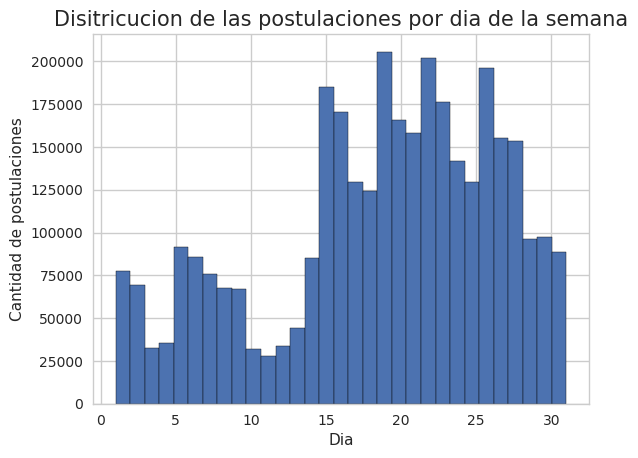

In [65]:
#Dsitricucion de las postulaciones por dia de la semana
g_day = pd.to_datetime(postulaciones['date']).dt.day.hist(bins=31,edgecolor='black');
g_day.set_title('Disitricucion de las postulaciones por dia de la semana',fontsize=15)
g_day.set_xlabel('Dia')
g_day.set_ylabel('Cantidad de postulaciones');

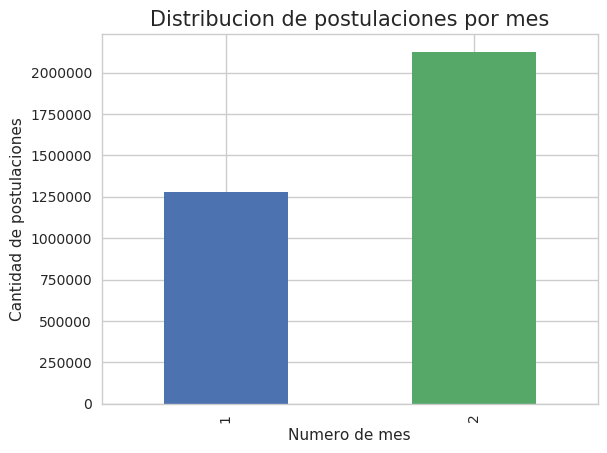

In [93]:
#Districucion de las postulaciones por mes. Obiamente solo hay datos de la mitad de Enero.
g_month = pd.to_datetime(postulaciones['date']).dt.month.value_counts().sort_index().plot(kind='bar')
g_month.set_title('Distribucion de postulaciones por mes',fontsize=15)
g_month.set_xlabel('Numero de mes')
g_month.set_ylabel('Cantidad de postulaciones');

Ambos graficos son engañosos. El primero muestra que hay mas postulaciones en la segunda mitad de los meses pero eso es porque los datos de Enero son solo de la segunda mitad del mes. De igual manera el sugundo grafico muestra que Enero tiene practicamente la mitad de postulaciones que Febrero. Tambien se debe a lo comentado anteriormente, solo hay datos de la segunda mitad de Enero.

In [87]:
#ACA HACER UN GRAFICO QUEMUESTRE LOS DIFERENTES DIAS DE CADA MES. PARA MOSTRAR QUE SOLO HAY DATOS DE LA MITAD DE 
#ENERO

In [ ]:
postulaciones_educacion.head()

In [ ]:
postulaciones_educacion['estado'].value_counts()

In [ ]:
postulaciones_genero_edad.head()

In [ ]:
vistas.head()

In [ ]:
avisos_online.head()

In [ ]:
avisos_detalle.head()